In [2]:
import matplotlib.pyplot as plt

from models import TransformerModelLooped
from curriculum import CurriculumSimple
from train import train_without_config, validate_model

n_dims = 10

In [ ]:
model_loop_b5_b15 = TransformerModelLooped(
    n_dims=n_dims,
    n_positions=101,
    n_embd=256,
    n_layer=1,
    n_head=4,
    pred_type="regression",
).cuda()

cirriculum_b5_b15 = CurriculumSimple(n_dims, 31, 5, [5000, n_dims, 0], [5000, 31, 0], [1000, 15, 1])

metrics_l1_b5_b15_d10 = train_without_config(
    model_loop_b5_b15, cirriculum_b5_b15, model_n_dims=n_dims, 
    log_every_steps=10, train_steps=15000, family="gpt2_loop", 
    do_wandb_log=False, seed=None, task_name="noisy_linear_regression")

number of parameters: 0.79M


  0%|          | 0/15000 [00:00<?, ?it/s]

0


loss 10.856019973754883:   2%|▏         | 366/15000 [00:20<13:18, 18.33it/s]

In [3]:
model_loop_b5 = TransformerModelLooped(
    n_dims=n_dims,
    n_positions=101,
    n_embd=256,
    n_layer=1,
    n_head=4,
    pred_type="regression",
).cuda()

cirriculum_b5 = CurriculumSimple(n_dims, 31, 5, [5000, n_dims, 0], [5000, 31, 0], [1000, 5, 0])

metrics_l1_b5_d10 = train_without_config(
    model_loop_b5, cirriculum_b5, model_n_dims=n_dims,
    log_every_steps=10, train_steps=15000, family="gpt2_loop",
    do_wandb_log=False, seed=None, task_name="noisy_linear_regression")

number of parameters: 0.79M


  0%|          | 0/15000 [00:00<?, ?it/s]

0


loss 2.7635741233825684: 100%|██████████| 15000/15000 [27:49<00:00,  8.98it/s]


In [4]:
model_loop_b20 = TransformerModelLooped(
    n_dims=n_dims,
    n_positions=101,
    n_embd=256,
    n_layer=1,
    n_head=4,
    pred_type="regression",
).cuda()

cirriculum_b20 = CurriculumSimple(n_dims, 31, 20, [5000, n_dims, 0], [5000, 31, 0], [5000, 20, 0])

metrics_l1_b20_d10 = train_without_config(model_loop_b20, cirriculum_b20, model_n_dims=n_dims, log_every_steps=10, train_steps=15000, family="gpt2_loop", do_wandb_log=False)

number of parameters: 0.79M


  0%|          | 0/15000 [00:00<?, ?it/s]

0


loss 2.324169874191284: 100%|██████████| 15000/15000 [55:27<00:00,  4.51it/s] 


In [6]:
def calculate_by_loop(model):
    val_by_loop = []
    loop_steps = []
    for i in range(1, 60):
        val_loss = validate_model(model, n_dims_truncated=10, n_loops=i, model_n_dims=10, n_points=21, family="gpt2_loop")
        val_by_loop.append(val_loss / n_dims)
        loop_steps.append(i)
    return loop_steps, val_by_loop 
steps_b5_b15, values_b5_b15 = calculate_by_loop(model_loop_b5_b15)

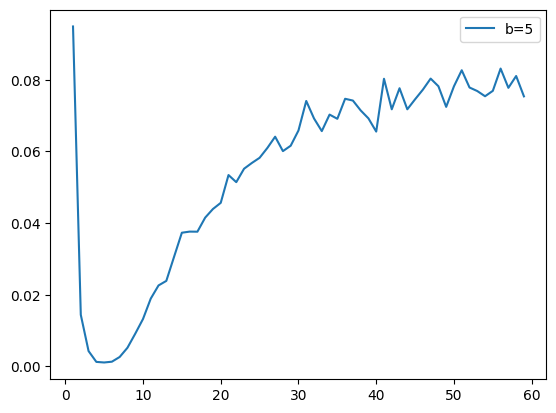

In [7]:
plt.plot(steps_b5_b15, values_b5_b15)
plt.legend(["b=5", "b=10", "b=20"])
#plt.savefig('../images/check_for_scheduling_convergence_properties.png')